In [1]:
import numpy as np
from astropy.io import fits
from astropy.table import Table
fits_data = r"C:\Users\James_Dev_Account\OneDrive - The University of Western Australia\Documents\Honours - Galaxy Classification\Galaxy-Classification-Research-Project\generated_data\photometric_decomposition_HT\photometric_decomposition_HT.fits"

hdulist = fits.open(fits_data)
hdulist.info()

Filename: C:\Users\James_Dev_Account\OneDrive - The University of Western Australia\Documents\Honours - Galaxy Classification\Galaxy-Classification-Research-Project\generated_data\photometric_decomposition_HT\photometric_decomposition_HT.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      16   (9708,)   uint8   
  1  Joined        1 BinTableHDU    412   404R x 200C   [I, 15A, D, D, 1A, I, I, I, I, I, I, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, L, 1A, I, I, 22A, 23A, D, D, 1A, 2

In [2]:
hdu = hdulist[1]
hdu.header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional table                            
NAXIS1  =                 1483 / width of table in bytes                        
NAXIS2  =                  404 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group                                 
TFIELDS =                  200 / number of columns                              
EXTNAME = 'Joined  '           / table name                                     
TTYPE1  = 'col1_1  '           / label for column 1                             
TFORM1  = 'I       '           / format for column 1                            
TTYPE2  = 'col2_1  '           / label for column 2                             
TFORM2  = '15A     '        

In [3]:
d = fits.getdata(fits_data, 1)
t = Table(d)

df = t.to_pandas()

In [4]:
df

,col1_1,col2_1,col3_1,col4_1,col5_1,col6_1,col7_1,col8_1,col9_1,col10_1,...,col8_2,col9_2,col10_2,col11_2,col12_2,col13_2,col14_2,col15_2,col16_2,col17_2
0,2,UGC00005,0.773513,-1.913835,K,1,1,0,1,0,...,S,ab,S,c,A,A,B,I,I,I
1,3,NGC7819,1.102105,31.472008,K,1,1,1,1,0,...,S,bc,S,c,A,A,B,I,I,I
2,4,UGC00029,1.140604,28.301724,U,1,1,0,0,0,...,E,0,E,1,A,A,A,I,I,I
3,5,IC1528,1.272403,-7.093390,K,1,1,0,0,0,...,S,ab,S,d,AB,A,B,I,I,I
4,6,NGC7824,1.275987,6.920147,K,1,1,0,1,0,...,S,a,S,ab,A,A,B,I,I,I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,8000,NGC0426,18.202530,-0.290190,U,1,0,0,0,0,...,E,3,S,0,A,A,A,I,I,I
400,9000,NGC0472,20.119539,32.709030,U,1,1,0,0,0,...,E,0,E,2,A,A,A,I,I,I
401,9004,NGC1281,50.025459,41.630032,K,1,1,0,0,0,...,E,7,S,0a,A,A,A,I,I,I
402,9005,NGC2767,137.549515,50.401299,K,1,1,1,1,0,...,E,0,S,0,A,A,A,I,I,I


In [5]:
df.rename(columns = {'col2_1': 'name', 'col3_1':'ra', 'col4_1':'dec'}, inplace=True)

In [6]:
df_ES = df[df["col5_1"] == "U"]

In [7]:
df_E = df[(df["col5_1"] == "K") & (df["col23"] == 1.0)]

In [8]:
ES_name_ra_dec = df_ES[["name", "ra", "dec"]]
ES_name_ra_dec = ES_name_ra_dec.copy()

In [9]:
E_name_ra_dec = df_E[["name", "ra", "dec"]]
E_name_ra_dec = E_name_ra_dec.copy()

In [10]:
def download_SDSS_imgcutouts(name_ra_dec_df):
    import requests
    import PIL as pil
    from PIL import Image
    from PIL import ImageOps
    import io
    name_ra_dec_df['image_data'] = None
    for row_index in name_ra_dec_df.index:
        row = name_ra_dec_df.loc[row_index]
        
        name = row["name"]
        ra = row["ra"]
        dec = row["dec"]
        
        url = r"http://skyserver.sdss.org/dr15/SkyServerWS/ImgCutout/getjpeg?ra=" + str(ra) + r"&dec=" + str(dec) + r"&scale=1&height=100&width=100"
        res = requests.get(url, timeout=60)
        
        img = Image.open(io.BytesIO(res.content))
        img = ImageOps.grayscale(img)
        img = img.resize((50, 50))
        np_arr = np.array(img)
        np_arr = (np_arr - np.min(np_arr)) / (np.max(np_arr) - np.min(np_arr))
        name_ra_dec_df.at[row_index, 'image_data'] = np_arr


In [11]:
download_SDSS_imgcutouts(E_name_ra_dec)
download_SDSS_imgcutouts(ES_name_ra_dec)

In [12]:
E_name_ra_dec.reset_index(inplace=True, drop=True)
E_name_ra_dec

,name,ra,dec,image_data
0,NGC0155,8.667001,-10.766513,"[[0.014778325123152709, 0.024630541871921183, ..."
1,NGC0517,21.182524,33.429592,"[[0.046948356807511735, 0.046948356807511735, ..."
2,NGC0731,28.734207,-9.010813,"[[0.0514018691588785, 0.014018691588785047, 0...."
3,NGC0774,29.894703,14.008204,"[[0.005128205128205128, 0.015384615384615385, ..."
4,NGC0938,37.139660,20.283697,"[[0.02403846153846154, 0.02403846153846154, 0...."
5,NGC1026,39.829975,6.544043,"[[0.0, 0.04, 0.03, 0.025, 0.03, 0.015, 0.015, ..."
6,UGC02229,41.364864,0.914349,"[[0.026455026455026454, 0.015873015873015872, ..."
7,NGC1361,53.573925,-6.264996,"[[0.02512562814070352, 0.04020100502512563, 0...."
8,NGC2918,143.933502,31.705465,"[[0.0196078431372549, 0.0196078431372549, 0.02..."
9,NGC3182,154.887634,58.205730,"[[0.024509803921568627, 0.0196078431372549, 0...."


In [13]:
ES_name_ra_dec.reset_index(inplace=True, drop=True)
ES_name_ra_dec

,name,ra,dec,image_data
0,UGC00029,1.140604,28.301724,"[[0.0, 0.0, 0.010101010101010102, 0.0101010101..."
1,NGC0499,20.797901,33.460190,"[[0.03553299492385787, 0.030456852791878174, 0..."
2,NGC0932,36.977905,20.332495,"[[0.06532663316582915, 0.08040201005025126, 0...."
3,NGC0962,38.165939,28.070009,"[[0.024390243902439025, 0.01951219512195122, 0..."
4,UGC02099,39.304108,21.567585,"[[0.021052631578947368, 0.010526315789473684, ..."
5,NGC1060,40.812794,32.424915,"[[0.049689440993788817, 0.06832298136645963, 0..."
6,NGC1132,43.215988,-1.274762,"[[0.020512820512820513, 0.020512820512820513, ..."
7,NGC1167,45.426403,35.205616,"[[0.0782122905027933, 0.0782122905027933, 0.08..."
8,NGC2513,120.602799,9.413553,"[[0.0, 0.015873015873015872, 0.026455026455026..."
9,NGC3615,169.527725,23.397322,"[[0.06103286384976526, 0.07042253521126761, 0...."


In [14]:
E_image_data = E_name_ra_dec['image_data'].to_numpy()
for index in range(E_image_data.shape[0]):
    E_image_data[index] = E_image_data[index].ravel()
    
E_image_data = np.concatenate(E_image_data)
np.savetxt('E_SDSS_image_data.txt', E_image_data)

In [15]:
E_metadata = E_name_ra_dec.drop('image_data', axis=1)
E_metadata.to_csv('E_SDSS_metadata.txt')

In [16]:
ES_image_data = ES_name_ra_dec['image_data'].to_numpy()
for index in range(ES_image_data.shape[0]):
    ES_image_data[index] = ES_image_data[index].ravel()
    
ES_image_data = np.concatenate(ES_image_data)
np.savetxt('ES_SDSS_image_data.txt', ES_image_data)

In [17]:
ES_metadata = ES_name_ra_dec.drop('image_data', axis=1)
ES_metadata.to_csv('ES_SDSS_metadata.txt')

[0.         0.         0.01010101 ... 0.02525253 0.01010101 0.01010101]


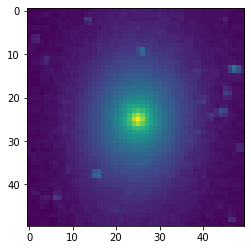

In [25]:
from matplotlib import pyplot as plt
print(ES_image_data[:50*50])
plt.imshow(ES_image_data[:50*50].reshape(50, 50))

In [ ]:
plt.imshow(ES_image_data[:50*50].reshape(50, 50))